# Brain Tumour Detection

This code is for training and evaluating the VGG16 (CNN model) for brain tumour detection on MRI images. The process involves several steps: data preparation, image preprocessing, model training, model performance evaluation and prediction on your own image.

During project development, the following parameters were involved:

**Software**
- OS: Windows 11
- Python 3.9.15 (Anaconda)
- IDE: PyCharm + Jupyter Notebook

**Hardware**
- CPU: i5-10300H
- RAM: 16GB
- GPU: NVIDIA GeForce GTX 1650 Ti (4 GB)

### Install the dataset from Kaggle

The dataset for training and testing the model was taken from the Kaggle platform (https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data). And has the following characteristics:
- **Data Type**: MRI images
- **Dataset Size**: 253 files
- **File Formats**: JPG, PNG, JPEG
- **Image Sizes**: Varying
- **Categories**:
  - Tumor present (yes): 155 images
  - No tumor (no): 98 images

In [10]:
! pip install kaggle

In [11]:
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors



  0%|          | 0.00/15.1M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.1M [00:00<00:07, 1.88MB/s]
 20%|#9        | 3.00M/15.1M [00:00<00:02, 5.32MB/s]
 46%|####6     | 7.00M/15.1M [00:00<00:00, 12.7MB/s]
 73%|#######2  | 11.0M/15.1M [00:00<00:00, 19.0MB/s]
 93%|#########2| 14.0M/15.1M [00:01<00:00, 20.9MB/s]
100%|##########| 15.1M/15.1M [00:01<00:00, 15.0MB/s]


In [16]:
import zipfile

with zipfile.ZipFile("brain-mri-images-for-brain-tumor-detection.zip", "r") as zip_ref:
    zip_ref.extractall(".")

### Package and library import

The following major libraries are involved in the project:
- TensorFlow / Keras
- OpenCV
- Scikit-learn
- Matplotlib
- NumPy

In [1]:
import pickle

from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix

from COV_brain_tumor_detection import (
    create_data_generators,
    TEST_DIR,
    TRAIN_DIR,
    VAL_DIR,
    create_model,
    preprocess_images,
    load_data,
    split_data,
    clean_directory,
    save_new_images,
    plot_confusion_matrix,
    plot_data_distribution,
    plot_model_performance,
    plot_samples, plot_precision_recall, plot_roc_curve
)

### Preparing data

In [2]:
split_data("brain_tumor_dataset")

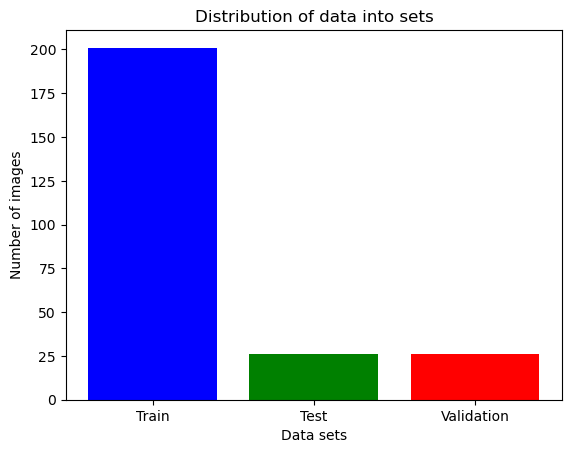

In [3]:
plot_data_distribution()

In [4]:
X_train, y_train, labels = load_data(TRAIN_DIR)
X_test, y_test, _ = load_data(TEST_DIR)
X_val, y_val, _ = load_data(VAL_DIR)

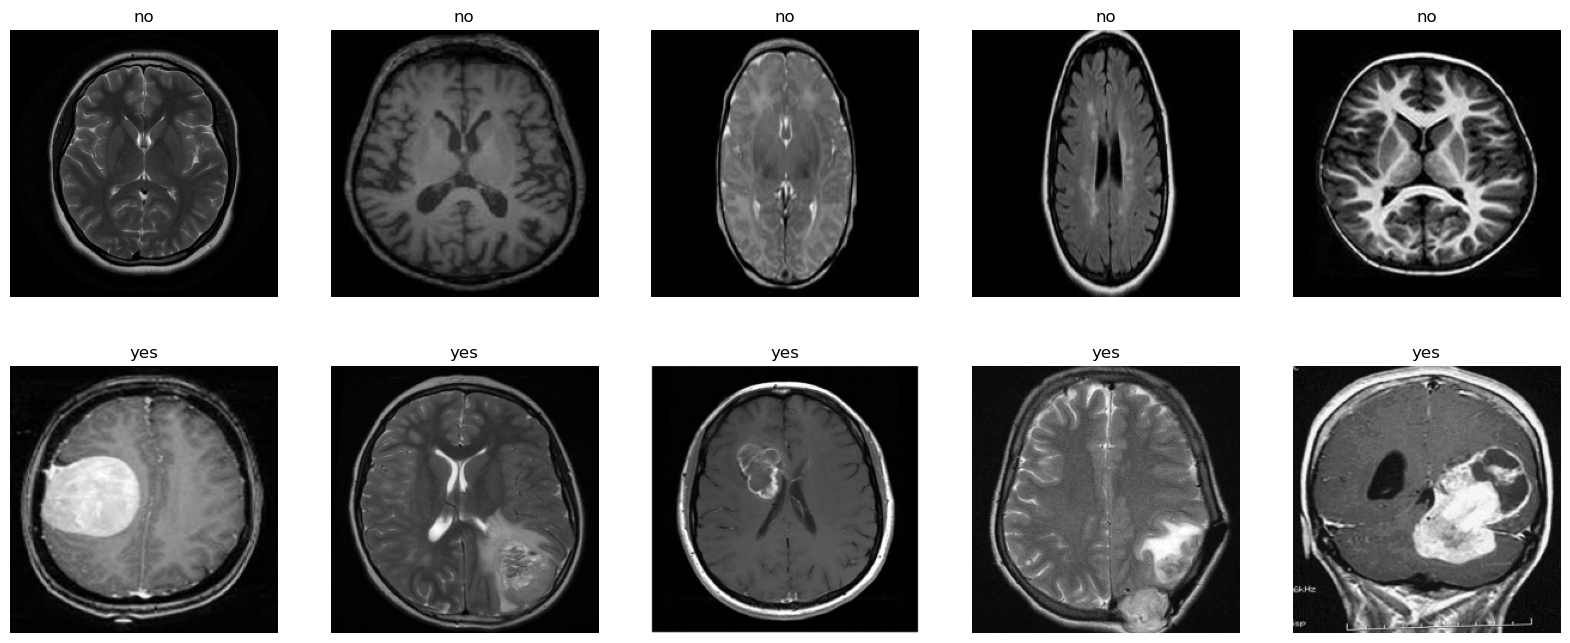

In [5]:
plot_samples(X_train, y_train, labels)

### Image preprocessing

In [6]:
X_train_prep = preprocess_images(X_train)
X_val_prep = preprocess_images(X_val)
X_test_prep = preprocess_images(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

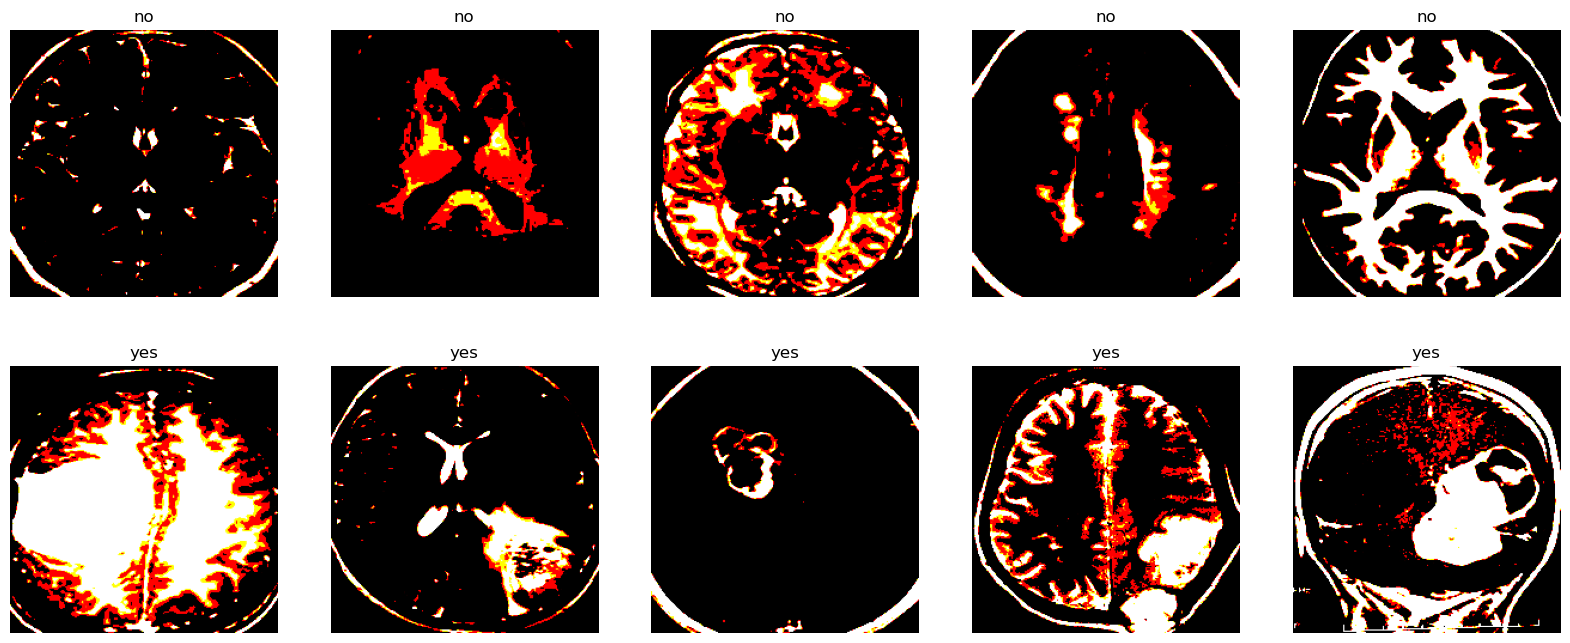

In [7]:
plot_samples(X_train_prep, y_train, labels)

### Saving and clearing data

In [8]:
save_new_images(X_train_prep, y_train, folder_name=TRAIN_DIR)
save_new_images(X_val_prep, y_val, folder_name=VAL_DIR)
save_new_images(X_test_prep, y_test, folder_name=TEST_DIR)

In [9]:
clean_directory(TRAIN_DIR)
clean_directory(VAL_DIR)
clean_directory(TEST_DIR)

### Model creation and training

In [10]:
model = create_model()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
train_generator, validation_generator = create_data_generators()

Found 201 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=7,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=2,
    callbacks=[EarlyStopping(monitor="val_accuracy", mode="max", patience=6)],
)

model.save('COV_brain_tumor_detection/cnn-vgg16.h5')

with open("COV_brain_tumor_detection/model_history.pkl", "wb") as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/30
7/7 [==============================] - 28s 4s/step - loss: 6.3059 - accuracy: 0.5323 - val_loss: 2.6568 - val_accuracy: 0.5769
Epoch 2/30
7/7 [==============================] - 28s 4s/step - loss: 2.1889 - accuracy: 0.7264 - val_loss: 2.3323 - val_accuracy: 0.6538
Epoch 3/30
7/7 [==============================] - 30s 4s/step - loss: 1.8083 - accuracy: 0.7512 - val_loss: 2.4797 - val_accuracy: 0.6538
Epoch 4/30
7/7 [==============================] - 30s 5s/step - loss: 2.0942 - accuracy: 0.7313 - val_loss: 2.4584 - val_accuracy: 0.7308
Epoch 5/30
7/7 [==============================] - 30s 4s/step - loss: 1.2456 - accuracy: 0.8109 - val_loss: 1.9102 - val_accuracy: 0.7692
Epoch 6/30
7/7 [==============================] - 31s 4s/step - loss: 1.9828 - accuracy: 0.7761 - val_loss: 5.9353 - val_accuracy: 0.6538
Epoch 7/30
7/7 [==============================] - 29s 4s/step - loss: 1.6463 - accuracy: 0.7960 - val_loss: 1.6751 - val_accuracy: 0.7308
Epoch 8/30
7/7 [==================

### Model evaluation

To evaluate the quality and effectiveness of the model, I used the following measures:
- Accuracy
- Loss
- Confusion Matrix
- AP (Average Precision)
- ROC (Receiver Operating Characteristic)

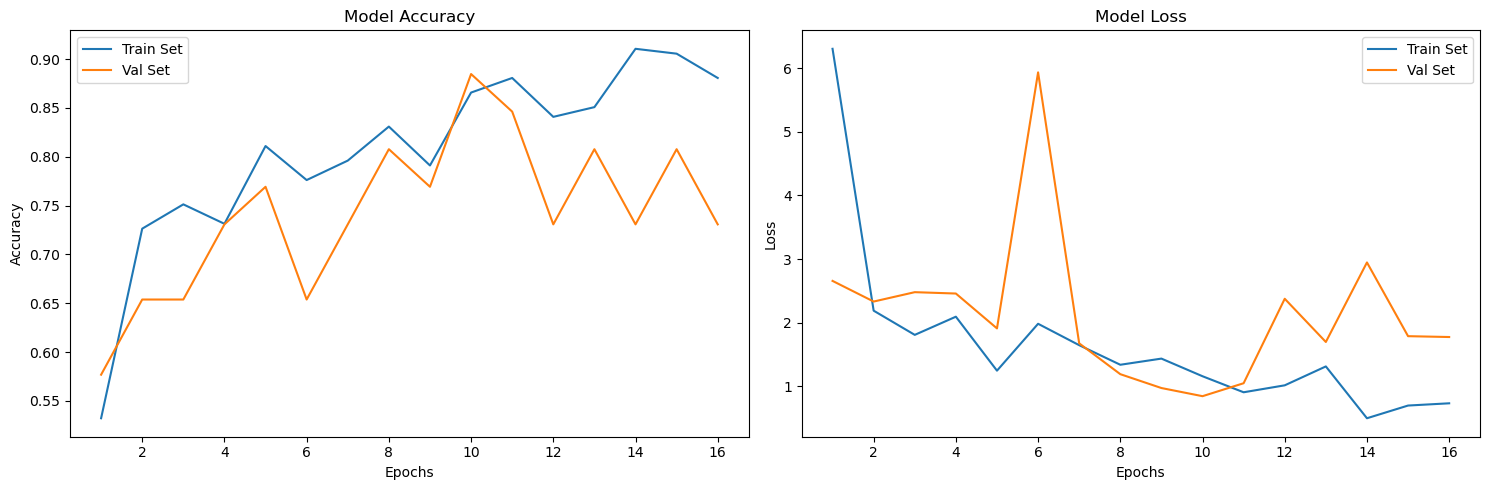

In [15]:
with open("COV_brain_tumor_detection/model_history.pkl", "rb") as file_pi:
    loaded_history = pickle.load(file_pi)
    
plot_model_performance(loaded_history)

In [16]:
predictions_test = [1 if x > 0.5 else 0 for x in model.predict(X_test_prep)]

1/1 [==============================] - 3s 3s/step


In [17]:
accuracy = accuracy_score(y_test, predictions_test)
print("Test Accuracy = %.2f" % accuracy)

Test Accuracy = 0.85


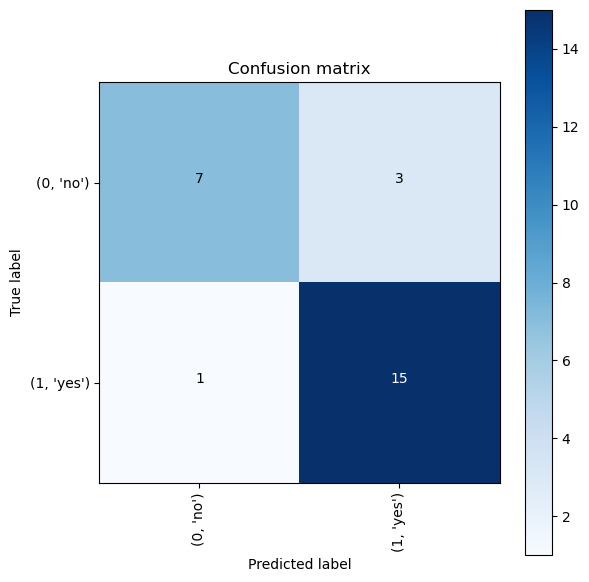

In [18]:
confusion_mtx = confusion_matrix(y_test, predictions_test)
plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

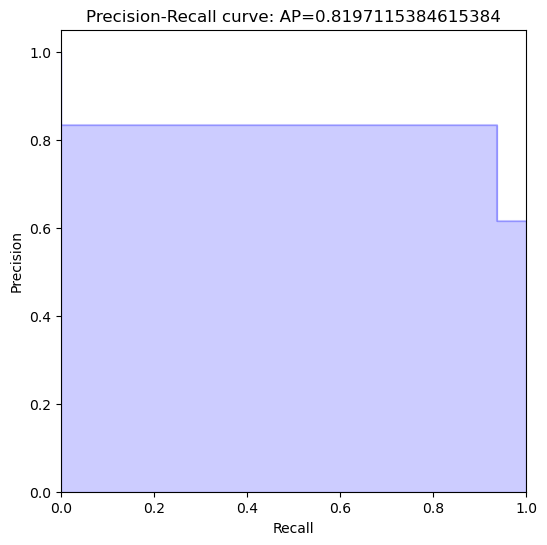

In [19]:
plot_precision_recall(y_test, predictions_test)

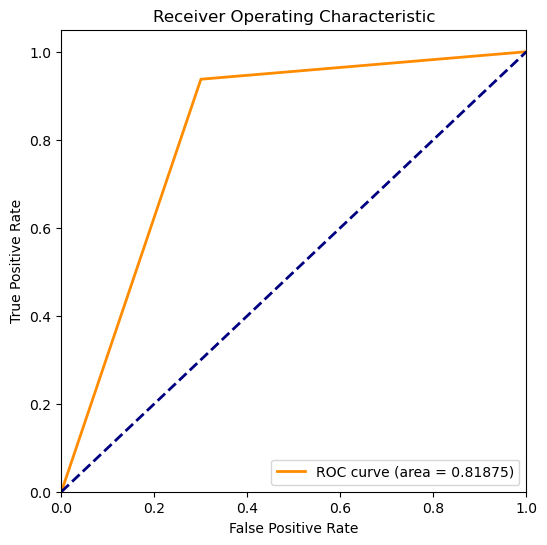

In [20]:
plot_roc_curve(y_test, predictions_test)

In the process of evaluating the efficiency and quality of the model, the following results were achieved:
- Accuracy: **~85%** (Target: >80%)
- Confusion Matrix: 
   - TP: **15**, TN: **7**, FP: **3**, FN: **1** (Target: achieve high overall classification accuracy)
- AP (Average Precision): **~82%** (Target: >80%)
- ROC (Receiver Operating Characteristic): **~82%** (Target: >0.80)

## Example of testing the model on personal image

In [1]:
import numpy as np

from PIL import Image
from keras.saving.save import load_model

In [2]:
model = load_model('COV_brain_tumor_detection/cnn-vgg16.h5')

In [3]:
def predict_tumor(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_tensor = np.expand_dims(img_array, axis=0)
    img_tensor = img_tensor.astype('float32') / 255.0

    prediction = model.predict(img_tensor)
    
    if prediction[0][0] > 0.5:
        return "The tumour was found"
    else:
        return "No tumour was found"

In [4]:
image_path = 'yes_tumor_example.jpg'

In [5]:
result = predict_tumor(image_path)
print(result)

1/1 [==============================] - 1s 681ms/step
The tumour was found
